In [2]:
# pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/wines_dataset.csv')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
##checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [11]:
df['wine_quality'] = df['quality'].map({'bad': 0, 'good': 1})
df = df.drop(columns=['quality'])

In [12]:
## Independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(128, input_shape=(scaled_X_train.shape[1],), activation='relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [26]:
model.layers

In [27]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
log_folder = "logs"
%load_ext tensorboard
!rm -rf logs
tb_cb = tf.keras.callbacks.TensorBoard(log_dir = log_folder, histogram_freq =1)

In [32]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [34]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [36]:
EPOCHS = 30
VALIDATION_SET = (scaled_X_test, y_test)

history = model.fit(scaled_X_train, y_train, epochs=100,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/100
40/40 [==============================] - 1s 18ms/step - loss: 0.4672 - accuracy: 0.7740 - val_loss: 0.4894 - val_accuracy: 0.7531
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 0.4661 - accuracy: 0.7725 - val_loss: 0.4887 - val_accuracy: 0.7594
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 0.4649 - accuracy: 0.7717 - val_loss: 0.4885 - val_accuracy: 0.7531
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 0.4644 - accuracy: 0.7748 - val_loss: 0.4880 - val_accuracy: 0.7531
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 0.4634 - accuracy: 0.7748 - val_loss: 0.4874 - val_accuracy: 0.7531
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 0.4624 - accuracy: 0.7772 - val_loss: 0.4860 - val_accuracy: 0.7531
Epoch 7/100
40/40 [==============================] - 0s 11ms/step - loss: 0.4614 - accuracy: 0.7780 - val_loss: 0.4858 - val_accuracy: 0.7531
Epoch 8/100

In [39]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [40]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_07_08_10_16_39_.h5 will be saved at TRAINED_MODEL/Model_2024_07_08_10_16_39_.h5


'TRAINED_MODEL/Model_2024_07_08_10_16_39_.h5'

In [41]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

<ipython-input-41-87cef6f4b7ac>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [43]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 40}

In [45]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.467236,0.774042,0.489410,0.753125
1,0.466052,0.772479,0.488694,0.759375
2,0.464947,0.771697,0.488512,0.753125
3,0.464398,0.774824,0.488011,0.753125
4,0.463429,0.774824,0.487374,0.753125
...,...,...,...,...
67,0.410322,0.806099,0.463862,0.781250
68,0.408465,0.813917,0.466158,0.765625
69,0.409246,0.805317,0.464483,0.778125
70,0.408042,0.812353,0.464940,0.775000


<Axes: >

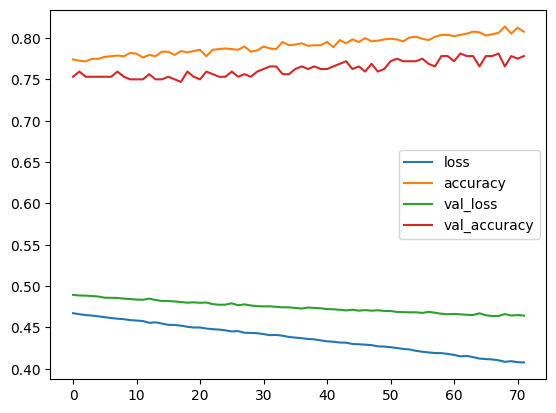

In [46]:
pd.DataFrame(history.history).plot()

In [50]:
model.evaluate(scaled_X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7781


[0.46385201811790466, 0.778124988079071]

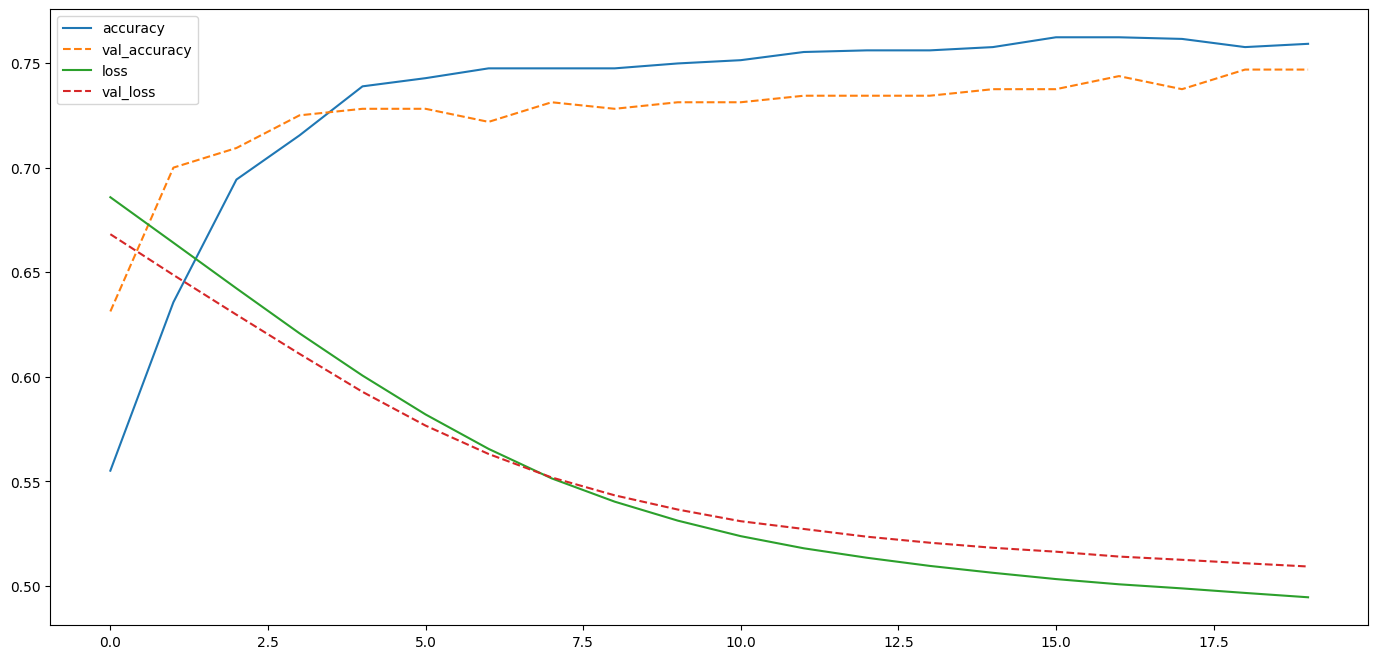

In [30]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots(figsize=(17,8))

plt.plot(cl.history['accuracy'], label='accuracy')
plt.plot(cl.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(cl.history['loss'], label='loss')
plt.plot(cl.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()